## LINEAR REGRESSION


#### Predicting profit based on population<br/>
Dataset is in <b><i><u>population.txt</b></i></u> <br/>
It consits of 97 datasamples<br/>
1st column <i>population</i> <br/>
2nd column <i>profit</i><br/>

In [270]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt


In [271]:
file ='population.txt'
data = pd.read_csv(file, header=None, names=['Population', 'Profit'])  
data.head()  

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [272]:
data.describe() 


,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [296]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))


Appending a column of 1's at the beinning of dataset

In [274]:
data.insert(0, 'Ones', 1)


now the dataset looks like this

In [275]:
data.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Converting input and output to matrices using pandas and numpy

In [277]:
cols = data.shape[1]  # np.shape() gives (rows,columns)
X=data.iloc[:,0:cols-1]
y=data.iloc[:,cols-1:cols]

In [278]:
X = np.matrix(X.values)  
y = np.matrix(y.values)  
param = np.matrix(np.array([0,0],dtype=float)) # for univariate only
X.shape, param.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [280]:
def computeCost1(X, y, param):
    '''
    X--- set of inputs , a numpy array of shape (97, 2)
    y--- set of actual outputs, a numpy array of shape (1, 2)
    param--- numpy array of shape (97, 1)
    '''
    
    inner = np.power((np.dot(X,param.T)-y),2)
    return np.sum(inner)/(2*len(y))
    
    

In [281]:
computeCost1(X, y, param)

32.072733877455676

### Gradient Descent (Batch mode)

In [282]:
def gradientDescent(X,y,param,alpha=0.001):
    temp = np.dot((np.dot(X,param.T)-y).T,X)
    param -= (alpha*1.0/len(y))*temp


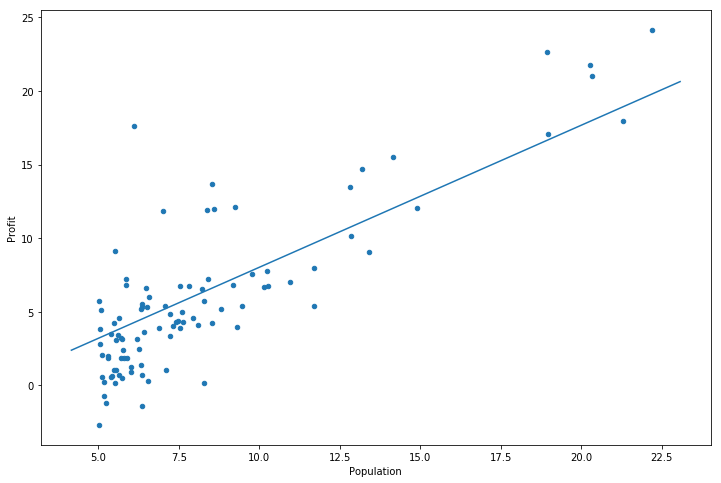

In [297]:
iterations = 1000
cost_values = []
for i in range(iterations):
    cost_values.append(computeCost1(X,y,param))
    gradientDescent(X,y,param)
axes = plt.gca()
#print(axes.get_xlim())

'''lineX = [i for i in range(int(data.min()[1]),int(data.max()[1]))]'''
lineY = []
for i in axes.get_xlim():
    lineY.append(param[0,0]+param[0,1]*i)
plt.plot(axes.get_xlim(),lineY)
plt.show()


#### Cost vs Iterations
This is required to verify whether cost is decreasing at every iteration or not.

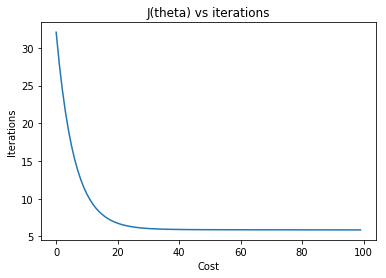

In [286]:
plt.title("J(theta) vs iterations")
plt.xlabel("Cost")
plt.ylabel("Iterations")
plt.plot(cost_values)
plt.show()

### Prediction 

In [288]:
def predict(x,param):
    return param[0,0]+param[0,1]*x

In [292]:
print("Slope %0.4f"% param[0,1])
print("Intercept %0.4f"% param[0,0])

pop = float(input("Enter population :"))
prof = predict(pop,param)
print("Predicted Profit %0.4f"% prof)

Slope 0.8006
Intercept 0.0087
Enter population :9.16
Predicted Profit 7.3425
